# EMNIST dataset
The EMNIST dataset is an extension of MNIST dataset. I used pip to install the EMNIST python package to import EMNIST dataset. The package provides functionality to automatically download and cache the dataset, and to load it as numpy arrays. In EMNIST package has balanced, byclass, bymerge, digits, letters, mnist. I selected 'bymerge' subset folder. Loaded the training and testing samples by import extract samples. The bymerge subset contains 47 classes including handwritten single capital letter, lowercase letter and digits between 0 to 9. There is 814,255 total characters separate into 2 groups as 697,932 for training set and 116,323 testing set and 2 groups as image(x) and label(y). Therefore, I have total 4 variables including x_train, x_test, y_train and y_test. Using shape property to get the shape of array.

In [11]:
# pip install emnist

import tensorflow as tf
import numpy as np
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

#Loading the train and test dataset
x_train, y_train =  extract_training_samples('bymerge')
x_test, y_test = extract_test_samples('bymerge')
print('Train set: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test set: x=%s, y=%s '% (x_test.shape, y_test.shape))


Train set: x=(697932, 28, 28), y=(697932,)
Test set: x=(116323, 28, 28), y=(116323,) 


## Visualization 
Display image at index 0 by using matplotlib.

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show

Display array of image above.

In [ ]:
array = x_train[0]

print(array)

# Preprocessing data
Reshape data and also changed data type to float32 because data normalization has values between 0 and 1

In [12]:
from keras.utils import np_utils
# Reshaping array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

y_train = np_utils.to_categorical(y_train, num_classes=62)
y_test = np_utils.to_categorical(y_test, num_classes=62)
# Change type of dataset to float32 for decimal points value 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the value between 0 to 1 by divided 255
x_train = x_train / 255
x_test = x_test/ 255

print('Train set: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test set: x=%s, y=%s '% (x_test.shape, y_test.shape))

Train set: x=(697932, 28, 28, 1), y=(697932, 62)
Test set: x=(116323, 28, 28, 1), y=(116323, 62) 


# Model and Train data

In [ ]:
from keras.layers import concatenate, Input
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D, Convolution2D
img_rows, img_cols = 28, 28

nb_filters_1 = 64
nb_filters_2 = 128
nb_filters_3 = 256
nb_conv = 3
nb_conv_mid = 4
nb_conv_init = 5

init = Input(shape=(28,28,1),)

fork11 = Convolution2D(nb_filters_1, nb_conv_init, nb_conv_init,  activation="relu", border_mode='same')(init)
fork12 = Convolution2D(nb_filters_1, nb_conv_init, nb_conv_init, activation="relu", border_mode='same')(init)
merge1 = concatenate([fork11, fork12])
maxpool1 = MaxPooling2D(strides=(2,2), border_mode='same')(merge1)

fork21 = Convolution2D(nb_filters_2, nb_conv_mid, nb_conv_mid, activation="relu", border_mode='same')(maxpool1)
fork22 = Convolution2D(nb_filters_2, nb_conv_mid, nb_conv_mid, activation="relu", border_mode='same')(maxpool1)
merge2 = concatenate([fork21, fork22, ])
maxpool2 = MaxPooling2D(strides=(2,2), border_mode='same')(merge2)

fork31 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork32 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork33 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork34 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork35 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork36 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
merge3 = concatenate([fork31, fork32, fork33, fork34, fork35, fork36 ])
maxpool3 = MaxPooling2D(strides=(2,2), border_mode='same')(merge3)

dropout = Dropout(0.5)(maxpool3)

flatten = Flatten()(dropout)
output = Dense(62, activation="softmax")(flatten)

model = Model(input=init, output=output)

model.summary()


In [16]:
from keras.optimizers import SGD

opt = SGD('adam',lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(x_train,y_train,# Train the model using the training set
          epochs=30, 
          verbose=1, validation_data=(x_test, y_test), callbacks=[callback] ) 

Train on 697932 samples, validate on 116323 samples
Epoch 1/5
697932/697932 [==============================] - 2377s 3ms/step - loss: 0.2647 - accuracy: 0.8999 - val_loss: 0.2698 - val_accuracy: 0.9035
Epoch 2/5
697932/697932 [==============================] - 2279s 3ms/step - loss: 0.2572 - accuracy: 0.9023 - val_loss: 0.2642 - val_accuracy: 0.9034
Epoch 3/5
595360/697932 [========================>.....] - ETA: 5:04 - loss: 0.2492 - accuracy: 0.9043

KeyboardInterrupt: 

# Evaluate model on test dataset

In [14]:
print(model.evaluate(x_test, y_test, verbose=1))

116323/116323 [==============================] - 244s 2ms/step
[0.2519114414216787, 0.9057108163833618]


# Saving model in HDF5 format


In [15]:
model.save_weights("model-DCNN_MNIST_30 epoch.h5")

# Accuracy and Loss Graph 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


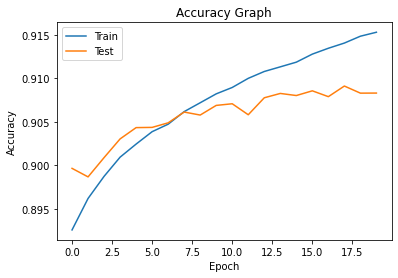

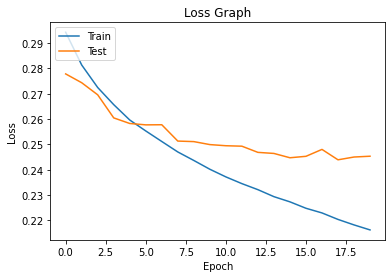

In [29]:
import matplotlib.pyplot as plt
print(history.history.keys())
# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Alphabet Prediction')

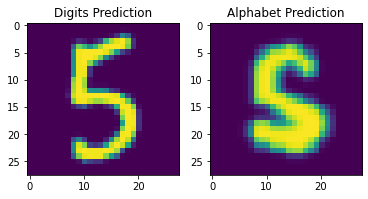

In [44]:
test_number = x_test[6].reshape(28,28)
test_letter = x_test[2].reshape(28,28)
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
img = plt.imshow(test_number)
a.set_title('Digits Prediction')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(test_letter)
a.set_title('Alphabet Prediction')

# Prediction 

In [43]:

classes = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

array = np.array(classes)
position_array_digits = model.predict(x_test[6].reshape(1,28,28,1))
position_array_digits=np.argmax(position_array_digits,axis=1)

position_array_alphabets = model.predict(x_test[2].reshape(1,28,28,1))
position_array_alphabets=np.argmax(position_array_alphabets,axis=1)

print('Digits Prediction: ',   array[position_array_digits])
print('Alphabet Prediction: ',   array[position_array_alphabets])

Digits Prediction:  ['5']
Alphabet Prediction:  ['S']
